 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [22]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
# import hvplot.pandas
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [23]:
# Reading whale returns
csv_file = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(csv_file, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [24]:
# Count nulls
whale_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [25]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [26]:
# Reading algorithmic returns
csv_file = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(csv_file, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [27]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [28]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [29]:
# Reading S&P 500 Closing Prices
csv_file = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(csv_file, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.head()
# sp500_history.reset_index(inplace=True)
# sp500_history.dtypes

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [30]:
# Check Data Types
sp500_history.dtypes


Close    object
dtype: object

In [31]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$", "", regex =False).astype("float")
sp500_history.dtypes


Close    float64
dtype: object

In [32]:
# Calculate Daily Returns
sp500_history = sp500_history.pct_change()


In [33]:
# Drop nulls
sp500_history = sp500_history.dropna().copy()
sp500_history


,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [34]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history.columns = ["S&P 500"]
sp500_history

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [35]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whale_returns, algo_returns, sp500_history], axis = "columns", join="inner")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

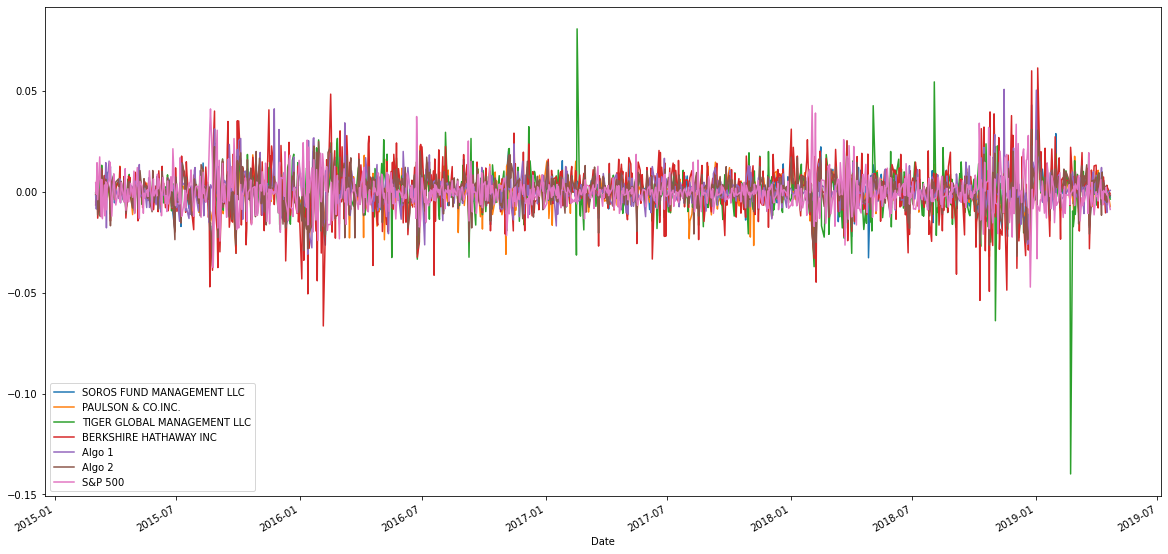

In [36]:
# Plot daily returns of all portfolios
show_plt = all_returns.plot(figsize=(20, 10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

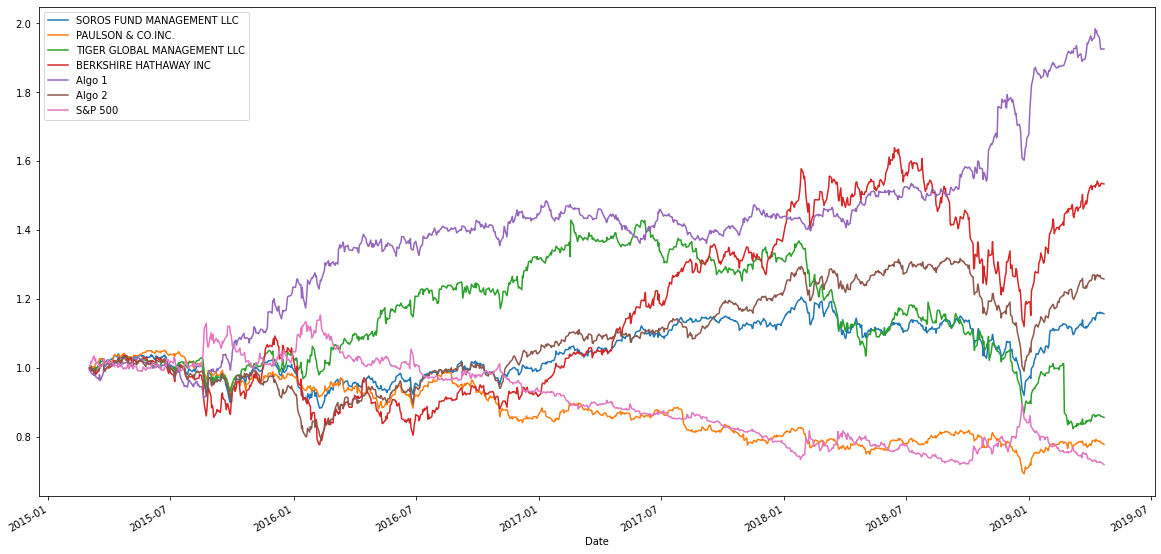

In [37]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

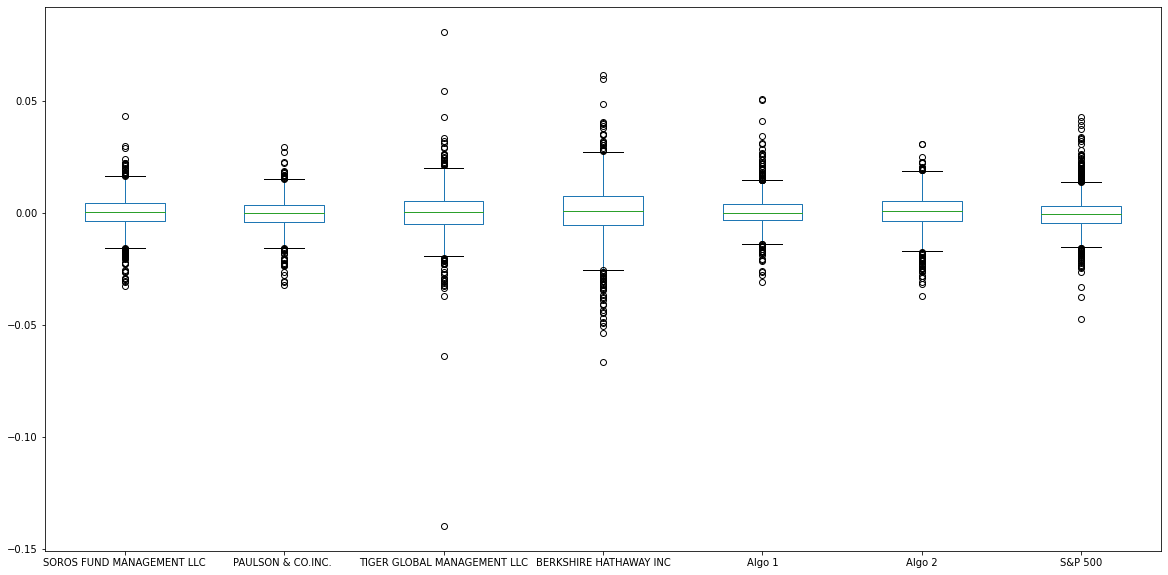

In [38]:
# Box plot to visually show risk
all_returns.plot(kind="box",figsize= (20,10))

### Calculate Standard Deviations

In [39]:
# Calculate the daily standard deviations of all portfolios
all_std = all_returns.std()
all_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [40]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500
all_std > all_returns["S&P 500"].std()


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized standard deviation (252 trading days)
all_std *np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Standard Dev. Rolling'}, xlabel='Date'>

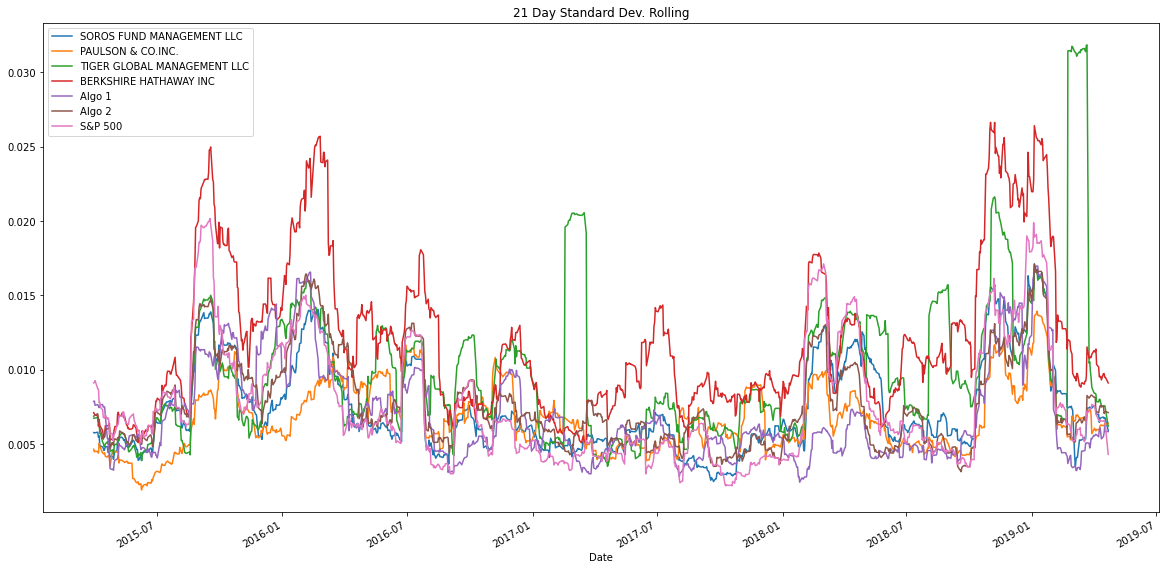

In [43]:

all_std = all_returns
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_std.rolling(window = 21).std()

# Plot the rolling standard deviation
all_std.rolling(window=21).std().plot(figsize=(20, 10), title = "21 Day Standard Dev. Rolling")

### Calculate and plot the correlation

In [44]:

# Calculate the correlation
correlations = all_std.corr()

# Display de correlation matrix
correlations.style.background_gradient(cmap="summer")


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [51]:
# Calculate covariance of a single portfolio
covar = all_std[goog_historical.csv].rolling(window = 60).cov(all_std["S&P 500"])

# Calculate variance of S&P 500
variance = all_std["S&P 500"].rolling(60).var

# Computing beta
beta = covar / variance

# Plot beta trend
beta.plot(figsize=(20,10), title="Google Beta")


NameError: name 'goog_historical' is not defined

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponential Weighted Average'}, xlabel='Date'>

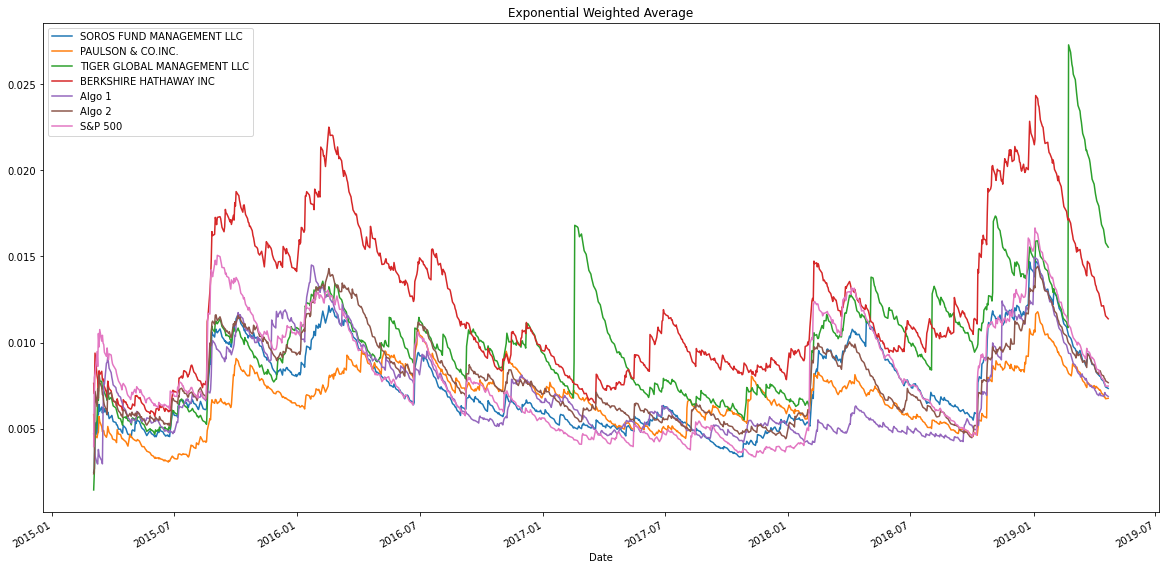

In [48]:
# Use `ewm` to calculate the rolling window
all_std.ewm(halflife=21).std().plot(figsize=(20, 10), title = "Exponential Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Annualized Sharpe Ratios
sh_ratios = (all_std.mean() * 252) / (all_std.std() * np.sqrt(252))
sh_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

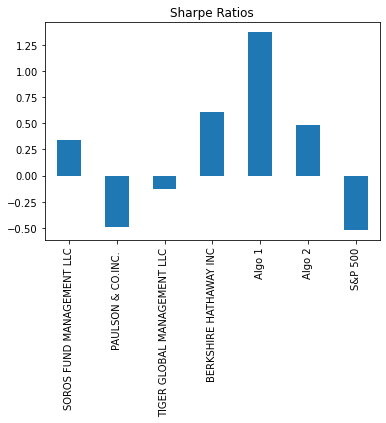

In [52]:
# Visualize the sharpe ratios as a bar plot
sh_ratios.plot(kind="bar",title= "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [53]:
# My answer:
"Yes Algo 1 did out preform both the S&P 500 and the Whales portfolio"

'Yes Algo 1 did out preform both the S&P 500 and the Whales portfolio'

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [58]:
# Reading data from 1st stock
csv_file = Path("Resources/goog_historical.csv")
google_hist = pd.read_csv(csv_file, index_col="Trade DATE", infer_datetime_format=True)
google_hist = google_hist.sort_index()
google_hist.head()

,Symbol,NOCP
Trade DATE,,
1/10/2019,GOOG,1070.33
1/11/2019,GOOG,1057.19
1/14/2019,GOOG,1044.69
1/15/2019,GOOG,1077.15
1/16/2019,GOOG,1080.97


In [64]:
# Reading data from 2nd stock
apple_historical = Path("Resources/aapl_historical.csv")
apple_csv = pd.read_csv(apple_historical, index_col="Trade DATE", infer_datetime_format=True)
apple_csv = apple_csv.sort_index()
apple_csv.head()

,Symbol,NOCP
Trade DATE,,
1/10/2019,AAPL,153.80
1/11/2019,AAPL,152.29
1/14/2019,AAPL,150.00
1/15/2019,AAPL,153.07
1/16/2019,AAPL,154.94


In [66]:
# Reading data from 3rd stock
cost_historical = Path("Resources/cost_historical.csv")
cost_csv = pd.read_csv(cost_historical, index_col="Trade DATE", infer_datetime_format=True)
cost_csv = cost_csv.sort_index()
cost_csv.head()

,Symbol,NOCP
Trade DATE,,
1/10/2019,COST,210.64
1/11/2019,COST,210.51
1/14/2019,COST,209.00
1/15/2019,COST,211.03
1/16/2019,COST,210.18


In [68]:
# Combine all stocks in a single DataFrame
stocks = pd.concat([google_hist, apple_csv, cost_csv], axis="rows", join="inner")
stocks.head()

,Symbol,NOCP
Trade DATE,,
1/10/2019,GOOG,1070.33
1/11/2019,GOOG,1057.19
1/14/2019,GOOG,1044.69
1/15/2019,GOOG,1077.15
1/16/2019,GOOG,1080.97


In [69]:
# Reset Date index
stocks = stocks.reset_index()
stocks.head()

,Trade DATE,Symbol,NOCP
0,1/10/2019,GOOG,1070.33
1,1/11/2019,GOOG,1057.19
2,1/14/2019,GOOG,1044.69
3,1/15/2019,GOOG,1077.15
4,1/16/2019,GOOG,1080.97


In [71]:
# Reorganize portfolio data by having a column per symbol
porfolio = stocks.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")

In [72]:
# Calculate daily returns
d_returns = porfolio.pct_change()
# Drop NAs
d_returns = d_returns.dropna().copy()
# Display sample data
d_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
1/11/2019,-0.009818,-0.000617,-0.012277
1/14/2019,-0.015037,-0.007173,-0.011824
1/15/2019,0.020467,0.009713,0.031071
1/16/2019,0.012217,-0.004028,0.003546
1/17/2019,0.005938,0.006090,0.008261


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [73]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = d_returns.dot(weights)

# Display sample data
portfolio_returns.head()


Trade DATE
1/11/2019   -0.007571
1/14/2019   -0.011345
1/15/2019    0.020417
1/16/2019    0.003912
1/17/2019    0.006763
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [76]:
# Defining all_portfolio
def all_portfolio():
# Join your returns DataFrame to the original returns DataFrame
    all_portfolio["Custom"] = portfolio_returns
    all_portfolio.tall()

In [82]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio.dropna().copy()

AttributeError: 'function' object has no attribute 'dropna'

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [85]:
def all_portfolio():
# Calculate the annualized `std`
    risk = all_portfolios.std() * np.sqrt(252)
    risk

### Calculate and plot rolling `std` with 21-day window

In [97]:
# Calculate rolling standard deviation
rolling_std = all_portfolio.rolling(window=21).std

# Plot rolling standard deviation
rolling_std.plot(figsize=(20, 10), title="21 Day Standard Dev. Rolling")


AttributeError: 'function' object has no attribute 'rolling'

### Calculate and plot the correlation

In [87]:
# Calculate and plot the correlation
df = all_protfolio.corr()
df.style.background_gradient(cmap="bwr")

NameError: name 'all_protfolio' is not defined

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [88]:
# Calculate and plot Beta
covar = all_portfolio["Custom"].rolling(window=60).cov(all_portfolio["S&P 500"])
Variance = all_portfolio["S&P 500"].rolling(60).var()
beta = (covariance / variance)
beta.plot(figsize=(20, 10), title="Custom Beta Portfolio")

TypeError: 'function' object is not subscriptable

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [89]:
# Calculate Annualzied Sharpe Ratios
sh_ratios = (all_portfolio.mean() * 252) / (all_portfolio.std() * np.sqrt(252))
sh_ratios

AttributeError: 'function' object has no attribute 'mean'

<AxesSubplot:title={'center':'Sharpe Ratios'}>

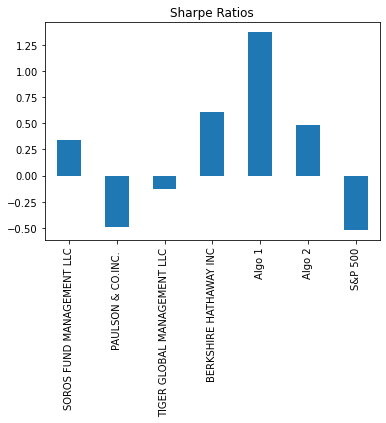

In [90]:
# Visualize the sharpe ratios as a bar plot
sh_ratios.plot.bar(title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [91]:
"Algo 1 is outpreforming  once again"

'Algo 1 is outpreforming  once again'